In [11]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [38]:
df = pd.read_csv('cardio_train.csv', sep=';')

In [14]:
# df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


### 1. Определите количество мужчин и женщин среди испытуемых

Кто знает, сколько гендеров существует для авторов датасета? Посмотрим и, если гендера всё же два, по среднему росту решим, какому гендеру принадлежит какой рост (у женщин < чем у мужчин)

In [7]:
print(df['gender'].unique())
print(df.query('gender == 1').height.mean())
print(df.query('gender == 2').height.mean())

[2 1]
161.35561168460356
169.94789538210054


Видим, что 1 - женщины, а 2 - мужчины.

In [9]:
print("Женщин в датасете {} человек".format(len(df.query('gender==1').index)))
print("Мужчин в датасете {} человек".format(len(df.query('gender==2').index)))



Женщин в датасете 45530 человек
Мужчин в датасете 24470 человек


### 2. Создайте новый признак --- BMI (body mass index, индекс массы тела). Для этого разделите вес в килограммах на квадрат роста в метрах.

In [109]:
df['BMI'] = df.weight/(df.height/100)**2
# df.head()

### 3. Визуализируйте распределение переменной BMI. Есть ли выбросы? 

Гистограмма наводит на подозрения, что это не просто какой-то ассиметричный график, что не зря Оу аж до 300

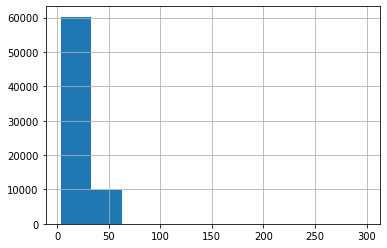

In [19]:
df.BMI.hist()

Боксплот придаёт уверенности в том, что выбросы есть и их очень много

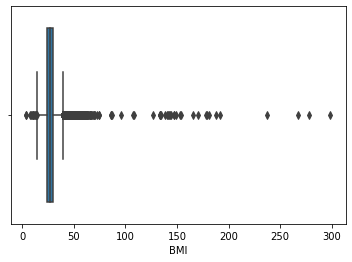

In [20]:
sns.boxplot(df.BMI)

### 4. Создайте новый датафрейм, где вы удалите пациентов, у которых диастолическое давление выше систолического. Какой процент от общего количества пациентов они составляли?
ap_hi - Systolic blood pressure
ap_lo - Diastolic blood pressure

In [33]:
ap_hi_higher = df.query('ap_hi >= ap_lo')
# ap_hi_higher
print('У {}% пациентов диастолическое давление выше систолического'.format(
    ((1 - (ap_hi_higher.id.count()) / df.id.count())*100).round(2)))

У 1.76% пациентов диастолическое давление выше систолического


### 5. Визуализируйте распределение уровня холестерина для различных возрастных категорий. 

In [80]:
df['age_years'] = df.age / 365
df = df.astype({'age_years':'int64'})


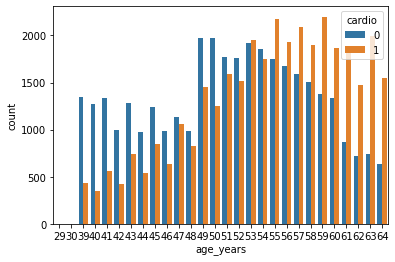

In [116]:
sns.countplot(x='age_years', hue='cardio', data = df)

### 6*(optional). Как соотносятся ИМТ и наличие ССЗ? Придумайте подходящую визуализацию. 
BMI Categories:
Underweight = <18.5
Normal weight = 18.5–24.9
Overweight = 25–29.9
Obesity = BMI of 30 or greater 

In [110]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years,group,BMI
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,50,50-64,21.967120
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,55,50-64,34.927679
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,51,50-64,23.507805
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,48,35-49,28.710479
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,47,35-49,23.011177


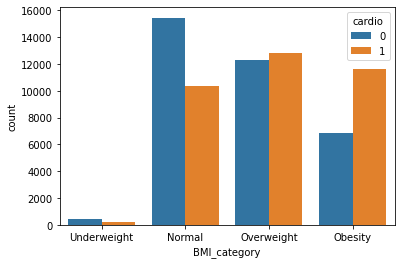

In [133]:
df.loc[df['BMI'] < 18.5, 'BMI_category'] = 'Underweight'
df.loc[(df['BMI'] >= 18.5) & (df['BMI'] < 25), 'BMI_category'] = 'Normal'
df.loc[(df['BMI'] >= 25) & (df['BMI'] < 30), 'BMI_category'] = 'Overweight'
df.loc[df['BMI'] >= 30, 'BMI_category'] = 'Obesity'

pl = sns.countplot(x='BMI_category', hue='cardio', data = df, order=['Underweight', 'Normal', 'Overweight', 'Obesity'])


С увеличением ИМТ увеличивается доля людей с наличием ССЗ